### Clustering with K-Means


by : Wahyudi Arlinawan Ridwan

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

#### Reading Data

In [2]:
df = pd.read_csv('Data untuk use case.csv')
df.head()

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Cleansing Data

In [3]:
df = df.set_index(['CustomerID'])  # Make the Customer ID column into an index

In [4]:
Gender = {'Gender':{'Male':1 , 'Female':0}}  # Transforming the Gender column
df.replace(Gender, inplace=True)
df.head()

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


##### Eksploration Data

In [5]:
df.describe()  # Summary of Numerical Data Statistics Calculation

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [6]:
df.nunique()  # "Count Distinct"/Unique data checking

Gender                       2
Age                         51
Telco Spending (IDR 000)    64
Purchasing power (1-100)    84
dtype: int64

In [7]:
df.isnull().sum()  # Null value data checking

Gender                      0
Age                         0
Telco Spending (IDR 000)    0
Purchasing power (1-100)    0
dtype: int64

#### Pair Plotting Data

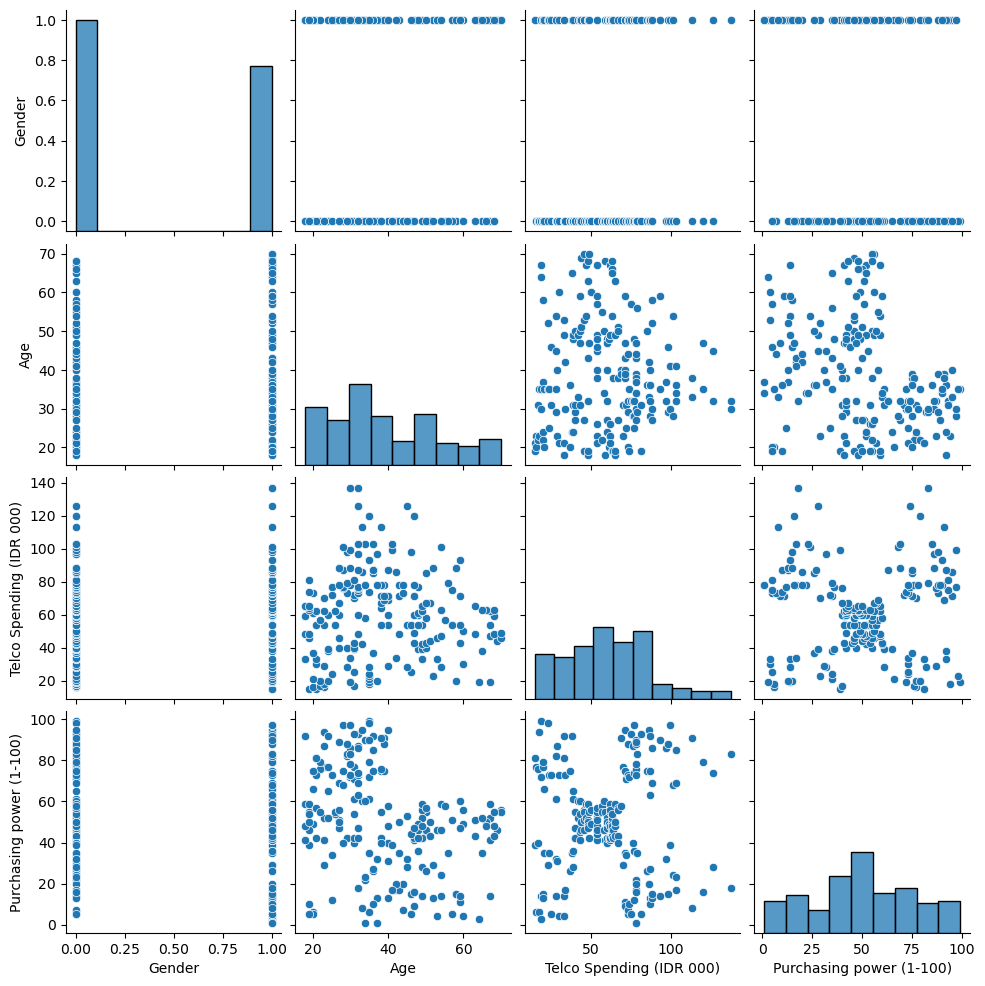

In [8]:
sns.pairplot(df)  # Correlation plot between variables

#### Identifying number of clusters with Elbow Method

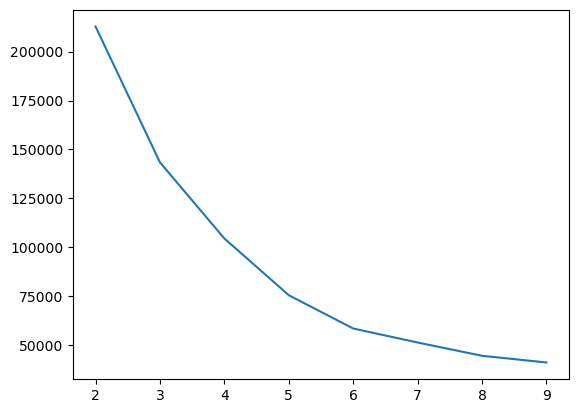

In [9]:
wcss = list()
for i in range(2,10):     # Use number of clusters in range 2-10
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10),wcss)


First hypothesis :The number of clusters obtained based on the elbow method is 5 or 6, so I have to try another way.

#### Use Silhouette Index to Indetifying Number of Clusters

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = list()
for j in range(2,10):   # Use number of clusters in range 2-10
    algorithm = (KMeans(n_clusters = j))
    algorithm.fit(df)
    labels = algorithm.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))
    
sil
    
    

[0.29307334005502633,
 0.383798873822341,
 0.4067767360772861,
 0.44424291275274114,
 0.45205475380756527,
 0.4347734443683834,
 0.427541566977401,
 0.4170582783992569]

Second hypothesis : Based on the silhouette score obtained, it is possible that the cluster number is at number 5 or 6 and is still in line with the results obtained using the elbow method. So we have to prove both numbers

First test with 6

In [11]:
kmeans = KMeans(6)   
kmeans.fit(df)
clusters = df.copy()
clusters['Cluster'] = kmeans.fit_predict(clusters)
clusters.head(10)

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,5
3,0,20,16,6,3
4,0,23,16,77,5
5,0,31,17,40,3
6,0,22,17,76,5
7,0,35,18,6,3
8,0,23,18,94,5
9,1,64,19,3,3


It turns out that the highest predictive number is 5 resulting in 6 clusters. So that we can try to make an plot using several variables.

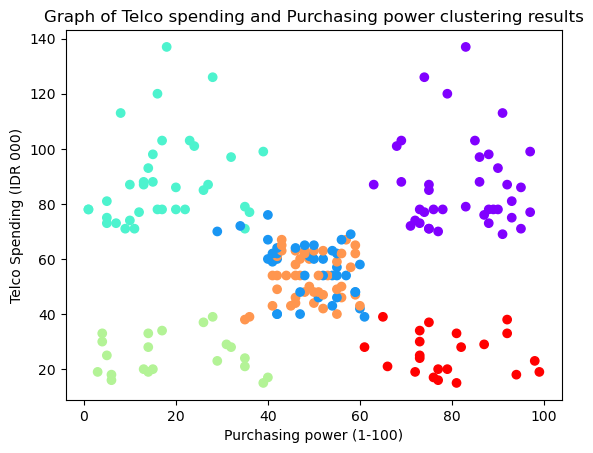

In [12]:
# We try to mapping data clustering using 6 clusters

plt.scatter(df['Purchasing power (1-100)'], df['Telco Spending (IDR 000)'], c=clusters['Cluster'], cmap='rainbow')
plt.xlabel('Purchasing power (1-100)')
plt.ylabel('Telco Spending (IDR 000)')
plt.title('Graph of Telco spending and Purchasing power clustering results')
plt.show()

The results of the mapping are obtained, if using 6 clusters, the results are not in accordance with the clustering requirements, namely homogeneous within the circle and the distance is different from between circles, due to the presence of clusters that accumulate in one circle.

Second Test with 5

In [13]:
kmeans = KMeans(5)   # Trying use 5 cluster
kmeans.fit(df)
clusters = df.copy()
clusters['Cluster'] = kmeans.fit_predict(clusters)
clusters.head()


,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,3
3,0,20,16,6,4
4,0,23,16,77,3
5,0,31,17,40,4


It turns out that the highest cluster number is 4 and resulting in 5 clusters. So that we can try to make an plot using several variables.

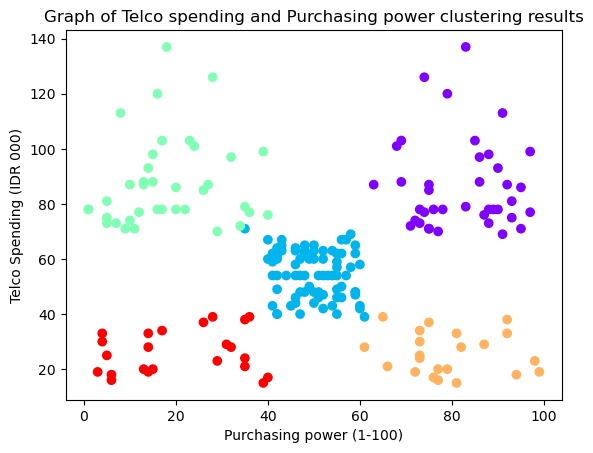

In [14]:
# We proof by mapping the data by grouping into 5 clusters 

plt.scatter(df['Purchasing power (1-100)'], df['Telco Spending (IDR 000)'], c=clusters['Cluster'], cmap='rainbow')
plt.xlabel('Purchasing power (1-100)')
plt.ylabel('Telco Spending (IDR 000)')
plt.title('Graph of Telco spending and Purchasing power clustering results')
plt.show()

The results are in accordance with the clustering requirements, namely homogeneous within one circle and the distance is different from other circles. So the most optimal cluster is 5 clusters for grouping this data

In [40]:
# The average value of several variables based on the cluster results

mean = clusters.groupby('Cluster').mean()
mean


,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
Cluster,,,,
0,0.527778,40.666667,87.750000,17.583333
1,0.391304,45.217391,26.304348,20.913043
2,0.461538,32.692308,86.538462,82.128205
3,0.409091,25.272727,25.727273,79.363636
4,0.412500,42.937500,55.087500,49.712500


In [42]:
# Customers grouping into priority levels based on the results of the average value

mean['Priority Level'] = ['Third Priority','Last Priority','Main Priority','Fourth Priority','Second Priority']
mean

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Priority Level
Cluster,,,,,
0,0.527778,40.666667,87.750000,17.583333,Third Priority
1,0.391304,45.217391,26.304348,20.913043,Last Priority
2,0.461538,32.692308,86.538462,82.128205,Main Priority
3,0.409091,25.272727,25.727273,79.363636,Fourth Priority
4,0.412500,42.937500,55.087500,49.712500,Second Priority


In [43]:
# Number of Customers per Clusters

count_gender = pd.DataFrame(clusters.groupby(['Cluster'])['Gender'].count())
count_gender

,Gender
Cluster,
0,36
1,23
2,39
3,22
4,80


In [ ]:
# Import data transformation and data clustering result into CSV for visualization needs

In [ ]:
mean.to_csv('Data_01.csv')

In [44]:
kmeans = KMeans(5)   
kmeans.fit(df)
clusters = df.copy()
clusters['Cluster'] = kmeans.fit_predict(clusters)

#Tranformasi gender
gender = {'Gender label':{1:'Male', 0:'Female'}}
gender_label = {'Gender label':{1:'Male', 0:'Female'}}
clusters['Gender label'] = clusters['Gender']
clusters.replace(gender_label, inplace=True)

# Tranformasi Age ke dalam bentuk age range
bins = [17,26,36,46,56,66,76]
labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '65+']
clusters['Age range'] = pd.cut(clusters.Age, bins, labels = labels, include_lowest = True)
# Labeling age range
bins = [17,26,36,46,56,66,76]
labels = ['Teenegers', 'early adulthood', 'late adulthood', 'early elder', 'late elder', 'aged']
clusters['Age range label'] = pd.cut(clusters['Age'], bins, labels = labels, include_lowest = True)

# Transformasi Telco spending ke dalam bentuk range
bins = [10,36,71,101,151]
labels = ['10-35', '36-70', '71-100', '101+']
clusters['Telco spending range(IDR 000)'] = pd.cut(clusters['Telco Spending (IDR 000)'], bins, labels=labels, include_lowest=True )
# Labeling Telco spending
bins = [10,36,71,101,151]
labels = ['Low', 'Middle', 'High', 'Very high']
clusters['Telco spending range label(IDR 000)'] = pd.cut(clusters['Telco Spending (IDR 000)'], bins, labels=labels, include_lowest=True )

# Transformasi Purchasing power ke dalam bentuk range
bins = [0,26,51,76,101]
labels = ['0-25', '26-50', '51-75', '76+']
clusters['Purchasing power range (1-100)'] = pd.cut(clusters['Purchasing power (1-100)'], bins, labels=labels, include_lowest=True )
# Labeling Purchasing power
bins = [0,26,51,76,101]
labels = ['weak', 'Moderate', 'Strong', 'Very strong']
clusters['Purchasing power range label (1-100)'] = pd.cut(clusters['Purchasing power (1-100)'], bins, labels=labels, include_lowest=True )

clusters

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Cluster,Gender label,Age range,Age range label,Telco spending range(IDR 000),Telco spending range label(IDR 000),Purchasing power range (1-100),Purchasing power range label (1-100)
CustomerID,,,,,,,,,,,,
1,1,19,15,39,1,Male,17-25,Teenegers,10-35,Low,26-50,Moderate
2,1,21,15,81,3,Male,17-25,Teenegers,10-35,Low,76+,Very strong
3,0,20,16,6,1,Female,17-25,Teenegers,10-35,Low,0-25,weak
4,0,23,16,77,3,Female,17-25,Teenegers,10-35,Low,76+,Very strong
5,0,31,17,40,1,Female,26-35,early adulthood,10-35,Low,26-50,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,35,120,79,0,Female,26-35,early adulthood,101+,Very high,76+,Very strong
197,0,45,126,28,4,Female,36-45,late adulthood,101+,Very high,26-50,Moderate
198,1,32,126,74,0,Male,26-35,early adulthood,101+,Very high,51-75,Strong


In [ ]:
clusters.to_csv('Data_01.csv')